In [7]:
options(repr.plot.width = 5, repr.plot.height = 5)

Der Datensatz enthält Daten zur Kriminalitätsstatistik in 90 Counties von North Carolina im
Jahr 1981. Im Unterschied zum Originaldatensatz ist die Zielgröße nicht die Kriminalitätsrate,
sondern die absolute Zahl von Verbrechen (crimes). Folgende potentiell erklärende Variablen
sind im Datensatz enthalten:
- prbarr – Probability of arrest: Anteil der Straftäter, die anschließend arrestiert werden
- prbpris – Probability of prison: Anteil der Straftäter, die zu einer Gefängnisstrafe verurteilt werden
- polpc – Anzahl der Polizisten pro Kopf der Bevölkerung
- density – Populationsdichte (Einwohner pro sq. Mile)
- area – Fläche des Counties
- taxpc – Pro-Kopf-Steueraufkommen
- region – Einteilung in die Regionen „west“, „central“ und „other“
- pctmin – Anteil von Minderheiten an der Gesamtbevölkerung
- pctymale – Anteil der jungen männlichen Bevölkerung (15-24 Jahre)
- wcon- wöchentlicher Lohn im Baugewerbe
- wsta – wöchentlicher Lohn der Staatsangestellten
- wser – wöchentlicher Lohn im Dienstleistungssektor
- wtrd – wöchentlicher Lohn im Handel
- wfir – wöchentlicher Lohn in Finanz, Versicherung und Immobilien

Aufgaben:
- Entwickeln Sie ein geeignetes statistisches Modell für die Zahl der Verbrechen. Berücksichtigen Sie dabei insbesondere die qualitative Einflussgröße region und deren mögliche Wechselwirkungen mit anderen Prädiktoren.

In [5]:
crimes = read.csv("../data/crimes.csv")
crimes

crimes,prbarr,prbpris,polpc,density,area,taxpc,region,pctmin,pctymale,wcon,wsta,wser,wtrd,wfir,name
3901,0.289696,0.472222,0.0017868,230.71590,423.943,25.69763,central,20.21870,0.0876968,206.4803,236.24,215.7335,182.3330,272.4492,Alamance County
416,0.202899,0.465753,0.0005939,97.68340,259.994,14.56088,central,7.91632,0.0870046,188.7683,247.38,191.3742,151.4234,202.4292,Alexander County
91,0.406593,0.500000,0.0008209,41.27659,235.059,18.63060,west,3.16053,0.0738525,147.9290,233.33,158.2278,143.5132,200.3205,Alleghany County
562,0.431095,0.431373,0.0014327,48.21764,531.452,38.24473,central,47.91610,0.0836378,284.5809,206.07,208.4636,174.2457,207.1006,Anson County
170,0.631579,0.383333,0.0008353,53.05164,426.135,16.85321,west,1.79619,0.0790580,195.9361,234.75,178.7785,152.7354,209.0301,Ashe County
275,0.369650,0.226415,0.0019067,59.10931,247.087,22.32144,west,1.54070,0.1063334,199.2377,227.69,176.5392,150.5835,195.3125,Avery County
1237,0.319665,0.500000,0.0012070,49.75787,827.192,20.10284,other,32.17940,0.0793392,192.6931,247.95,182.9082,172.9289,230.1118,Beaufort County
354,0.453258,0.489130,0.0009521,30.09986,699.270,21.63124,other,61.05400,0.0905428,192.3077,253.39,169.6833,164.6214,253.5926,Bertie County
569,0.483986,0.460317,0.0013272,34.92605,874.328,24.73512,other,40.38900,0.0859525,162.6483,226.58,161.2160,178.4642,202.4292,Bladen County
828,0.326196,0.404580,0.0019298,43.37209,846.973,53.86683,other,24.31170,0.0824936,207.1006,238.67,174.0470,144.7477,211.4724,Brunswick County


In [38]:
crimes$population = crimes$density * crimes$area
crimes$crimeph = crimes$crimes / crimes$population

crimes

crimes,prbarr,prbpris,polpc,density,area,taxpc,region,pctmin,pctymale,wcon,wsta,wser,wtrd,wfir,name,population,crimeph
3901,0.289696,0.472222,0.0017868,230.71590,423.943,25.69763,central,20.21870,0.0876968,206.4803,236.24,215.7335,182.3330,272.4492,Alamance County,97810.391,0.039883288
416,0.202899,0.465753,0.0005939,97.68340,259.994,14.56088,central,7.91632,0.0870046,188.7683,247.38,191.3742,151.4234,202.4292,Alexander County,25397.098,0.016379824
91,0.406593,0.500000,0.0008209,41.27659,235.059,18.63060,west,3.16053,0.0738525,147.9290,233.33,158.2278,143.5132,200.3205,Alleghany County,9702.434,0.009379090
562,0.431095,0.431373,0.0014327,48.21764,531.452,38.24473,central,47.91610,0.0836378,284.5809,206.07,208.4636,174.2457,207.1006,Anson County,25625.361,0.021931398
170,0.631579,0.383333,0.0008353,53.05164,426.135,16.85321,west,1.79619,0.0790580,195.9361,234.75,178.7785,152.7354,209.0301,Ashe County,22607.161,0.007519741
275,0.369650,0.226415,0.0019067,59.10931,247.087,22.32144,west,1.54070,0.1063334,199.2377,227.69,176.5392,150.5835,195.3125,Avery County,14605.142,0.018828985
1237,0.319665,0.500000,0.0012070,49.75787,827.192,20.10284,other,32.17940,0.0793392,192.6931,247.95,182.9082,172.9289,230.1118,Beaufort County,41159.312,0.030053952
354,0.453258,0.489130,0.0009521,30.09986,699.270,21.63124,other,61.05400,0.0905428,192.3077,253.39,169.6833,164.6214,253.5926,Bertie County,21047.929,0.016818757
569,0.483986,0.460317,0.0013272,34.92605,874.328,24.73512,other,40.38900,0.0859525,162.6483,226.58,161.2160,178.4642,202.4292,Bladen County,30536.823,0.018633241
828,0.326196,0.404580,0.0019298,43.37209,846.973,53.86683,other,24.31170,0.0824936,207.1006,238.67,174.0470,144.7477,211.4724,Brunswick County,36734.989,0.022539819


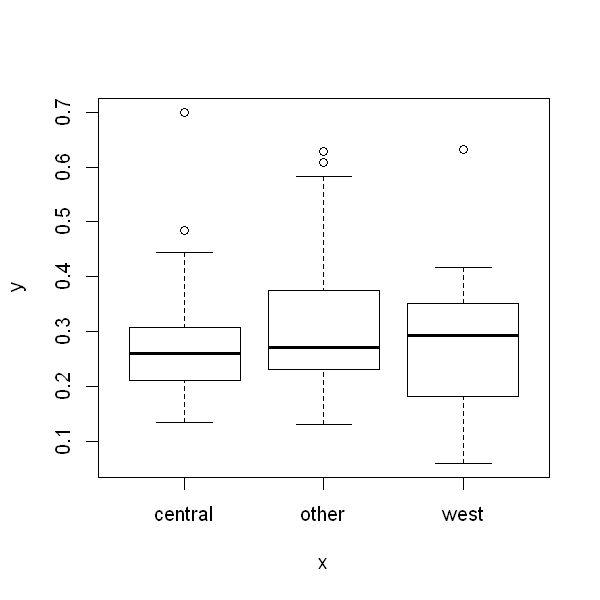

In [20]:
plot(crimes$region, crimes$prbarr)

- durchschnittlich werden in west am meisten Straftäter arrestiert
- Varianz bei other tendiert eher zu einer hohen Wahrscheinlichkeit -> Also Wahrscheinlichkeit hoch, das Straftäter gefasst werden (bis zu 60% aller Straftäter)

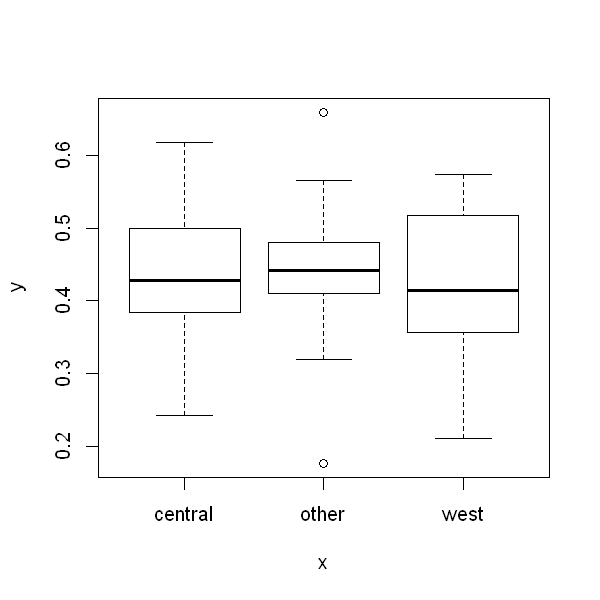

In [9]:
plot(crimes$region, crimes$prbpris)

- Ähnliche Durchschnittswahrscheinlichkeiten, das Arrestierte auch eine Gefängnisstrafe erhalten
- other hat dabei geringste Varianz und häche Durchschnittswahrscheinlichkeit

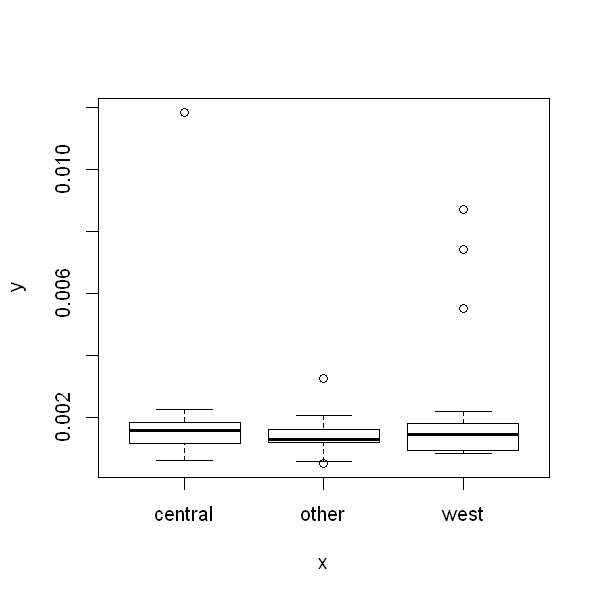

In [17]:
plot(crimes$region, crimes$polpc)

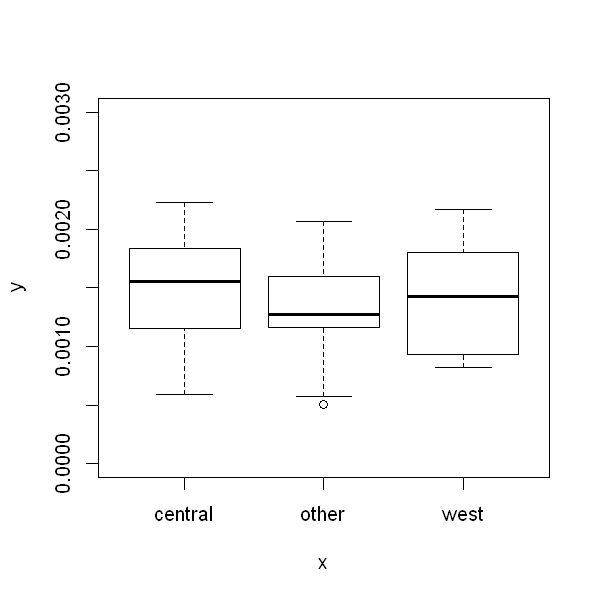

In [18]:
plot(crimes$region, crimes$polpc, ylim=c(0.000, 0.003))

- other weniger Polizisten als central und west
- central hat durchschnittlich mehr Polizisten pro Kopf
- Varianz aller relativ gleich

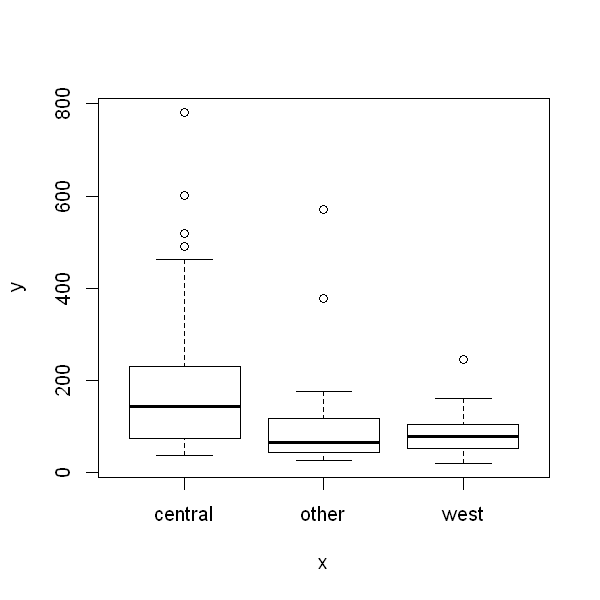

In [19]:
plot(crimes$region, crimes$density)

- central hat eine viel höhere Populationsdichte und auch der Durchschnitt ist viel höher

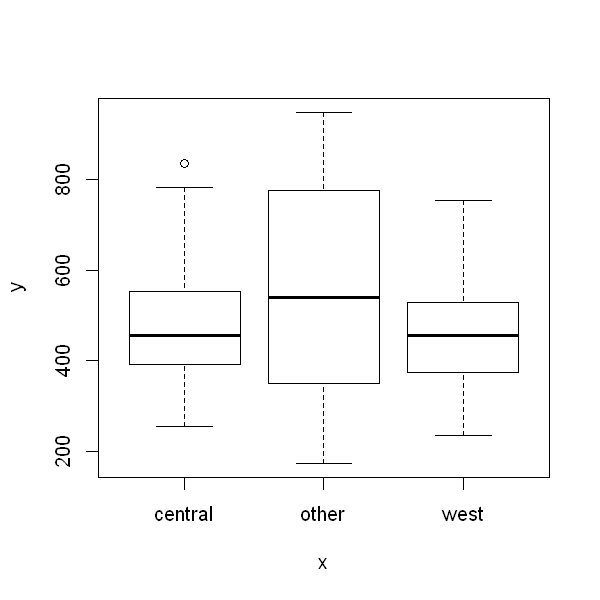

In [8]:
plot(crimes$region, crimes$area)

- other hat größere Varianz in der Fläche
- central und west sind sehr gleich von der Fläche

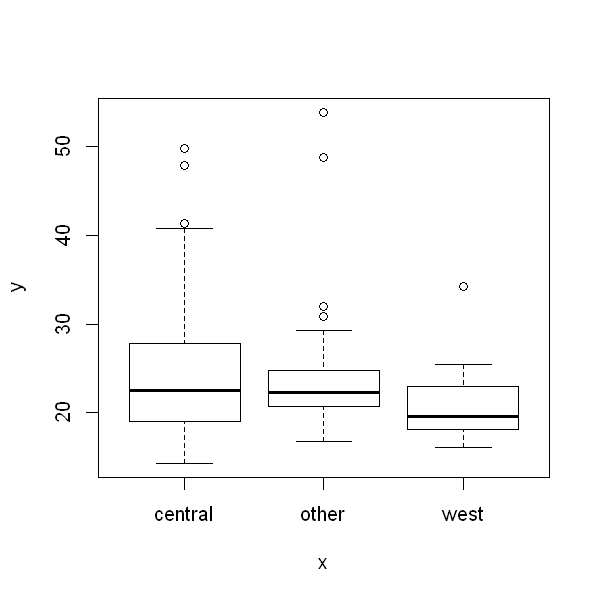

In [21]:
plot(crimes$region, crimes$taxpc)

- in west Einkommen geringer, da pro Kopf weniger Steuern gezahlt werden (bzw. mehr niedriger bezahlte Jobs)
- in central Varianz sehr groß, also viele die weniger verdienen und ein paar Gebiete wo Personen viel mehr verdienen bzw. reich sind (Grenze zwischen Arm und Reich größer?)

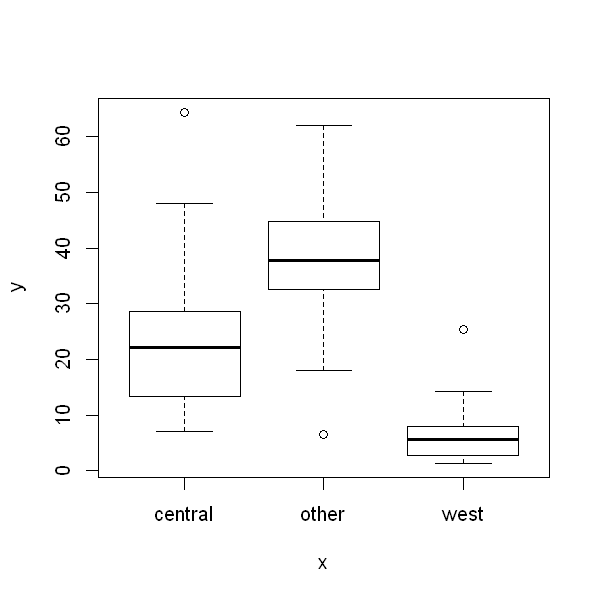

In [22]:
plot(crimes$region, crimes$pctmin)

- other hat höchsten Anteil an Minderheiten
- west geringsten Anteil an Minderheiten in der Bevölkerung
- central und other haben ähnliche Varianz (schwanken stark mit dem Anteil an Minderheiten)

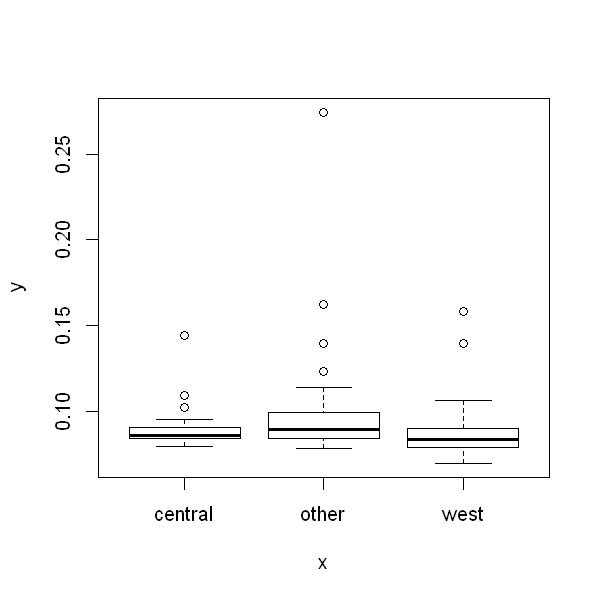

In [23]:
plot(crimes$region, crimes$pctymale)

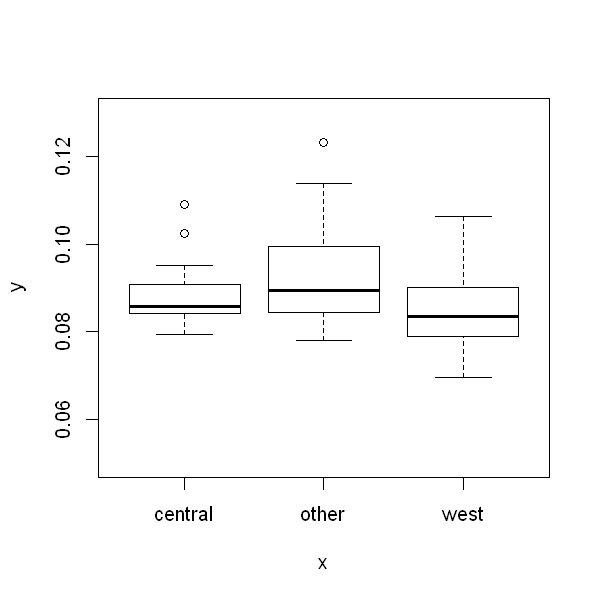

In [26]:
plot(crimes$region, crimes$pctymale, ylim=c(0.05,0.13))

- in other durschnittlich am meisten junge Männer
- weichen alle nicht stark voneinander ab
- Varianz in central sehr gering

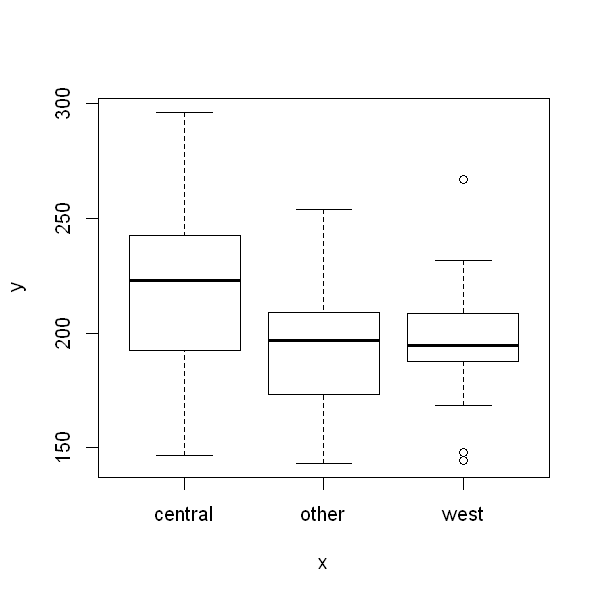

In [27]:
plot(crimes$region, crimes$wcon)

- vergleichsweise hohes Einkommen in diesem Job
- central höchste Varianz und auch höchster Durchschnittswert

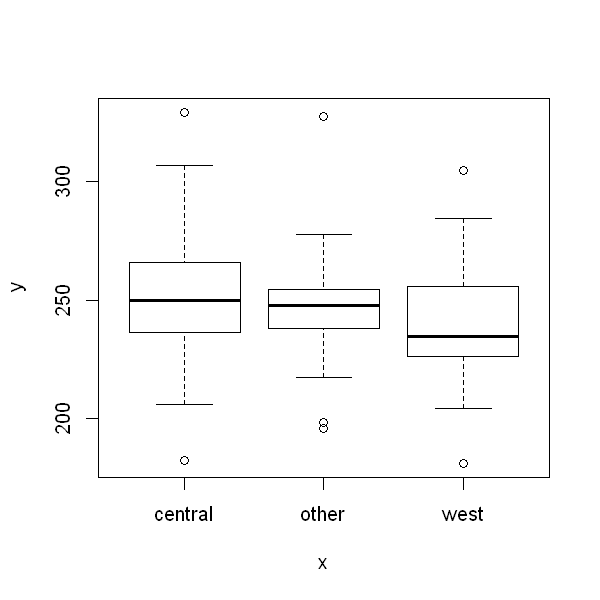

In [28]:
plot(crimes$region, crimes$wsta)

- sehr hohes Einkommen in diesem Job (fast durchschnittlich 250 Dollar pro Woche)
- in central hächste Varianz und auch höchster Durchschnittswert
- Einkommen in dem Job grundsätzlich Ähnlich in jeder Region

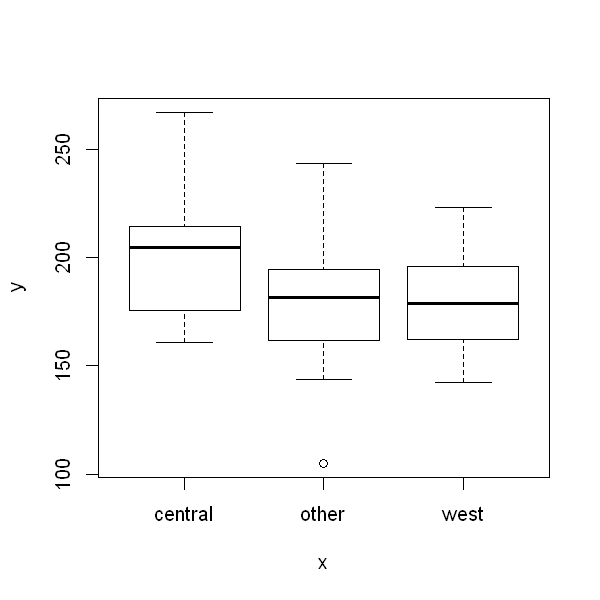

In [29]:
plot(crimes$region, crimes$wser)

- relativ hohes Einkommen im Job und auch ähnlich in jeder Region
- in central höchstes Durchschnittseinkommen
- Varianz in alle relativ gleich groß

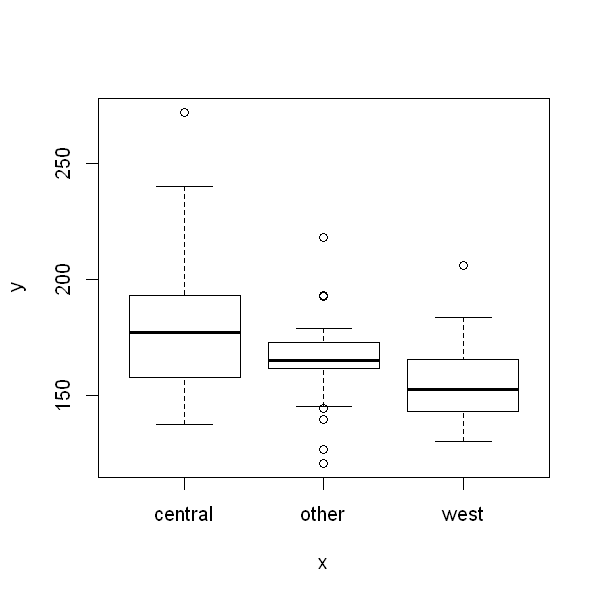

In [30]:
plot(crimes$region, crimes$wtrd)

- grundsätzlich eher geringes Einkommen, in central viel mehr als in west
- in other ist Varianz viel geringer
- central hat höchstes Durchschnittseinkommen und auch Varianz

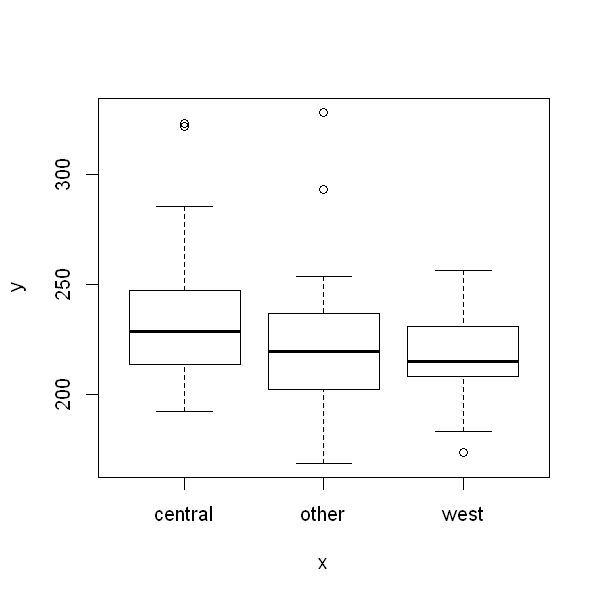

In [31]:
plot(crimes$region, crimes$wfir)

- hohes Einkommen in allen Regionen und auch ähnlich viel
- in central höchstes Durchschnittseinkommen
- Varianz bei allen recht ähnlich

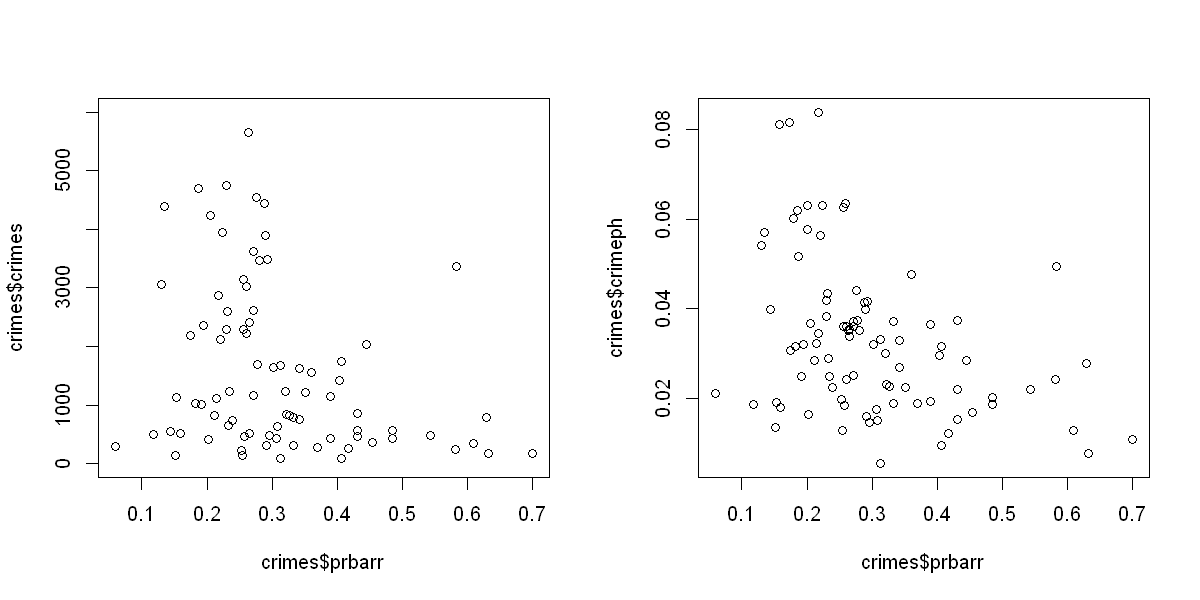

In [44]:
options(repr.plot.width = 10, repr.plot.height = 5)

par(mfrow = c(1,2))
plot(crimes$prbarr, crimes$crimes, ylim=c(0, 6000))
plot(crimes$prbarr, crimes$crimeph)

options(repr.plot.width = 5, repr.plot.height = 5)

- mit höhere Anzahl an arrestierten Straftätern, sinkt die Anzahl an Straftaten

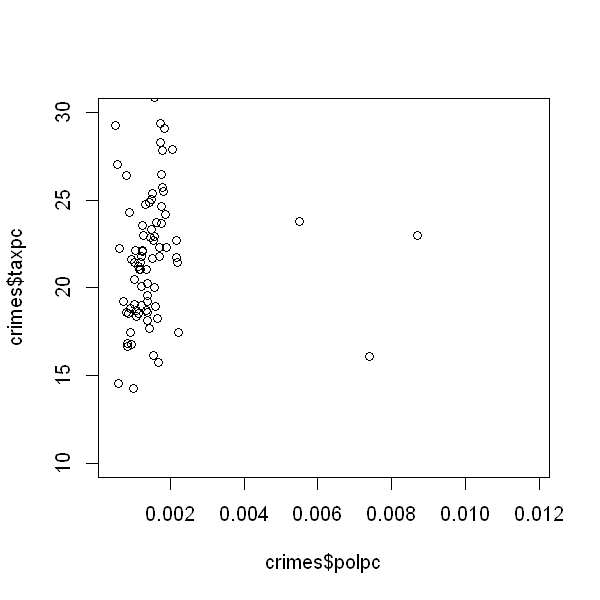

In [53]:
plot(crimes$polpc, crimes$taxpc, ylim=c(10, 30))

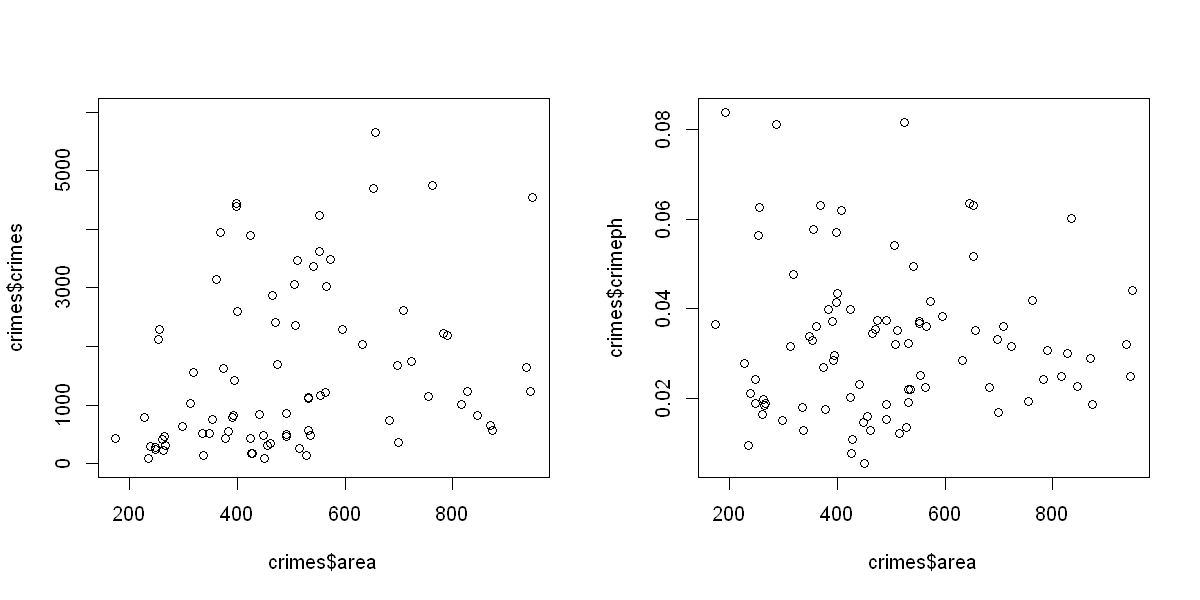

In [55]:
options(repr.plot.width = 10, repr.plot.height = 5)

par(mfrow = c(1,2))
plot(crimes$area, crimes$crimes, ylim=c(0, 6000))
plot(crimes$area, crimes$crimeph)

options(repr.plot.width = 5, repr.plot.height = 5)

In [70]:
glm1 <- glm(crimes ~ 1 + region, data=crimes, family=poisson(link="log"))
glm1


Call:  glm(formula = crimes ~ 1 + region, family = poisson(link = "log"), 
    data = crimes)

Coefficients:
(Intercept)  regionother   regionwest  
     8.4690      -0.7501      -1.5343  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    424300 
Residual Deviance: 350800 	AIC: 351600

In [71]:
glm2 <- glm(crimes ~ 1 + region, data=crimes, family=gaussian(link="identity"))
glm2


Call:  glm(formula = crimes ~ 1 + region, family = gaussian(link = "identity"), 
    data = crimes)

Coefficients:
(Intercept)  regionother   regionwest  
       4765        -2514        -3738  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    2.243e+09 
Residual Deviance: 2.036e+09 	AIC: 1788

In [72]:
glm3 <- glm(crimes ~ 1 + region, data=crimes, family=Gamma(link="inverse"))
glm3


Call:  glm(formula = crimes ~ 1 + region, family = Gamma(link = "inverse"), 
    data = crimes)

Coefficients:
(Intercept)  regionother   regionwest  
  0.0002099    0.0002345    0.0007635  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    150.4 
Residual Deviance: 121.9 	AIC: 1596

In [73]:
glm4 <- glm(crimes ~ 1 + region, data=crimes, family=inverse.gaussian(link="1/mu^2"))
glm4


Call:  glm(formula = crimes ~ 1 + region, family = inverse.gaussian(link = "1/mu^2"), 
    data = crimes)

Coefficients:
(Intercept)  regionother   regionwest  
  4.404e-08    1.534e-07    9.034e-07  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    0.1135 
Residual Deviance: 0.1012 	AIC: 1581

In [74]:
glm5 <- glm(crimes ~ 1 + region, data=crimes, family=quasi(link="identity", variance="constant"))
glm5


Call:  glm(formula = crimes ~ 1 + region, family = quasi(link = "identity", 
    variance = "constant"), data = crimes)

Coefficients:
(Intercept)  regionother   regionwest  
       4765        -2514        -3738  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    2.243e+09 
Residual Deviance: 2.036e+09 	AIC: NA

In [75]:
glm6 <- glm(crimes ~ 1 + region, data=crimes, family=quasipoisson(link="log"))
glm6


Call:  glm(formula = crimes ~ 1 + region, family = quasipoisson(link = "log"), 
    data = crimes)

Coefficients:
(Intercept)  regionother   regionwest  
     8.4690      -0.7501      -1.5343  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    424300 
Residual Deviance: 350800 	AIC: NA